In [4]:
import numpy as np
import matplotlib.pyplot as plt
from os import path

In [192]:
def load(fname):
    return np.genfromtxt(fname).reshape((2, 1024))

def calcanisotropy(dat, g = 0.88, bg = None, shift = 0):
    if bg == None:
        dat = dat - np.average(dat[:,185:190], axis = 1)[:, None]
    else:
        dat = dat - np.array(bg)[:, None]
    if shift < 0:
        dat[0,:shift] = dat[0,-shift:]
    elif shift > 0:
        dat[0, shift:] = dat[0,:-shift]
    return(dat[0] * g - dat[1]) / (dat[0] * g + 2 * dat[1])

In [193]:
g = 0.867
shift = 1

wdir = r'N:\Singlem\singlem19-3\September\24_CD95_NV_NB'

fname = r'Run1\tacs\noL_1.dat'
file = path.join(wdir, fname)
noL1_dat = np.transpose(np.genfromtxt(file))

fname = r'Run1\tacs\noL_1_lessthan100cnts.dat'
file = path.join(wdir, fname)
noL1empty_dat = np.transpose(np.genfromtxt(file))

fname = r'Run1\tacs\noL_1_morethan100cnts.dat'
file = path.join(wdir, fname)
noL1full_dat = np.transpose(np.genfromtxt(file))

fname = r'Run1\tacs\t10.dat'
file = path.join(wdir, fname)
t10dat = np.transpose(np.genfromtxt(file))

fname = r'Run1\tacs\t90.dat'
file = path.join(wdir, fname)
t90dat = np.transpose(np.genfromtxt(file))

fname = r'Run1\tacs\t140.dat'
file = path.join(wdir, fname)
t140dat = np.transpose(np.genfromtxt(file))

fname = r'Run1\tacs\t150.dat'
file = path.join(wdir, fname)
t150dat = np.transpose(np.genfromtxt(file))

fname = r'ref\tacs\IRF_after.dat'
file = path.join(wdir, fname)
IRFdat = np.transpose(np.genfromtxt(file))

fname = r'ref\tacs\EGFP_insol.dat'
file = path.join(wdir, fname)
GFPdat = np.transpose(np.genfromtxt(file))

fname = r'ref\tacs\Rh110_thick_after_meas.dat'
file = path.join(wdir, fname)
Rh110dat = np.transpose(np.genfromtxt(file))

fname = r'ref\tacs\Rh110_thick_after_meas_1024.dat'
file = path.join(wdir, fname)
Rh110_1024dat = np.transpose(np.genfromtxt(file))

at10dat = calcanisotropy(t10dat, g, bg = None, shift = shift)
at90dat = calcanisotropy(t90dat, g, bg = None, shift = shift)
at140dat = calcanisotropy(t140dat, g, bg = None, shift  = shift)
at150dat = calcanisotropy(t150dat, g, bg = None, shift  = shift)
aGFPdat = calcanisotropy(GFPdat, g, bg = None, shift = shift)
aIRFdat = calcanisotropy(IRFdat, g, bg = None, shift = shift)
#aRh110dat = calcanisotropy(Rh110dat, g, bg = None, shift = 1)
aRh110_1024dat = calcanisotropy(Rh110_1024dat, g, bg = [0,0], shift = 2)
anoL1_dat = calcanisotropy(noL1_dat, g, bg = None, shift = shift)
anoL1emptydat = calcanisotropy(noL1empty_dat, g, bg = None, shift = 4)
anoL1fulldat = calcanisotropy(noL1full_dat, g, bg = None, shift = 4)

C:\Users\voort\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


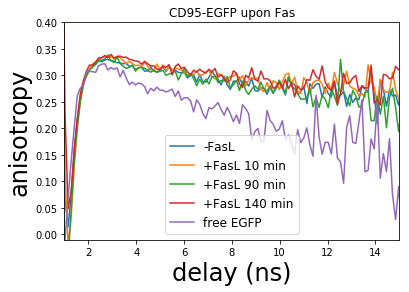

In [199]:
plt.plot(np.arange(256)*4*0.032, anoL1_dat, label = '-FasL')
plt.plot(np.arange(256)*4*0.032, at10dat, label = '+FasL 10 min')
plt.plot(np.arange(256)*4*0.032, at90dat, label = '+FasL 90 min')
plt.plot(np.arange(256)*4*0.032, at140dat, label = '+FasL 140 min')
plt.plot(np.arange(256)*4*0.032, aGFPdat, label = 'free EGFP')
#plt.plot(np.arange(1024)*0.032, aRh110_1024dat, label = 'Rh110')
#plt.plot(np.arange(1024)*0.032, anoL1emptydat, label = 'no Ligand, low intensity')
#plt.plot(np.arange(1024)*0.032, anoL1fulldat, label = 'no Ligand, cluster')

plt.xlim(1,15)
plt.ylim(-0.01, 0.4)
plt.xlabel('delay (ns)', size = 24)
plt.ylabel('anisotropy', size = 24)
plt.title('CD95-EGFP upon Fas')
plt.legend(prop={'size': 12})
plt.savefig('20190926CD95EGFP_Fasl_anisotropy.png', bbox_inches = 'tight', dpi = 300)

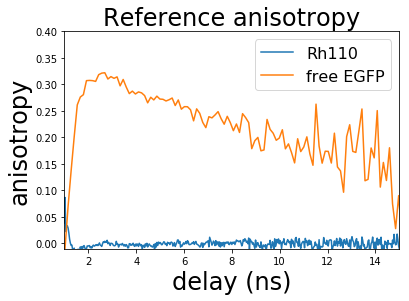

In [195]:
plt.plot(np.arange(1024)*0.032, aRh110_1024dat, label = 'Rh110')
plt.plot(np.arange(256)*4*0.032, aGFPdat, label = 'free EGFP')


plt.xlim(1,15)
plt.ylim(-0.01, 0.4)
plt.xlabel('delay (ns)', size = 24)
plt.ylabel('anisotropy', size = 24)
plt.title('Reference anisotropy', size = 24)
plt.legend(prop={'size': 16})
plt.savefig('20190926ReferenceAnisotropy', bbox_inches = 'tight', dpi = 300)

In [165]:
def plotPS(dat, g, bg = None, shift = 0, binning = 4, label = ''):
    if bg == None:
        dat = dat - np.average(dat[:,0:1], axis = 1)[:, None]
    if shift < 0:
        dat[0,:shift] = dat[0,-shift:]
    elif shift > 0:
        dat[0, shift:] = dat[0,:-shift]
    plt.plot(np.arange(1024/binning)*binning*0.032, dat[0]*g-dat[0,0], label = label + ' P')
    plt.plot(np.arange(1024/binning)*binning*0.032, dat[1]-dat[1,0], label = label + ' S')
    ax = plt.gca()
    ax.set_yscale('log')
    return plt.gcf(), ax

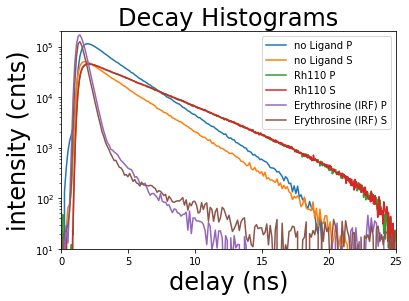

In [202]:
#fig1, ax = plotPS(t150dat, g, None, shift = 1, binning = 4, label = 't150')
#fig2, ax = plotPS(t90dat, g, None, shift = 1, binning = 4, label = 't90')
fig1, ax = plotPS(noL1_dat, g, None, shift = 1, binning = 4, label = 'no Ligand')
fig2, ax = plotPS(Rh110_1024dat, g, None, shift = 2, binning = 1, label = 'Rh110')
fig3, ax = plotPS(IRFdat, g, None, shift = 0, binning = 4, label = 'Erythrosine (IRF)')
ax.set_xlim([0,25])
plt.legend(prop = {'size': 10})
#plt.plot( [1,2], [62500, 62500])

plt.xlabel('delay (ns)', size = 24)
plt.ylabel('intensity (cnts)', size = 24)
plt.title('Decay Histograms', size = 24)
plt.ylim([10,20e4])
#ax.set_yscale('linear')

plt.savefig('20190926DecayHistrograms', bbox_inches = 'tight', dpi = 300)

In [162]:
 np.average(t90dat[:,185:190], axis = 1)[:, None]

array([[64.8],
       [40.4]])